Title: Regression Models

Polynomial Regression

Task 1: Apply polynomial regression to a dataset showing the relationship between age and income.

Mean Squared Error: 2190062.96
R-squared: 0.99


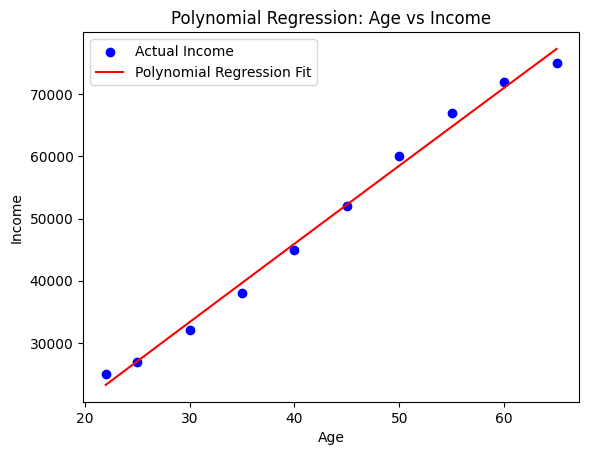

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Sample synthetic data: Age vs Income
data = {
    'Age': [22, 25, 30, 35, 40, 45, 50, 55, 60, 65],
    'Income': [25000, 27000, 32000, 38000, 45000, 52000, 60000, 67000, 72000, 75000]
}

df = pd.DataFrame(data)

# Prepare the input and output
X = df[['Age']].values  # Features need to be 2D array
y = df['Income'].values

# Transform features to polynomial features (degree 2 for example)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict income values
y_pred = model.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Income')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Fit')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Polynomial Regression: Age vs Income')
plt.legend()
plt.show()


Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

Linear Regression -> MSE: 2191022.72, R²: 0.99
Polynomial Regression (Degree 4) -> MSE: 27486.67, R²: 1.00


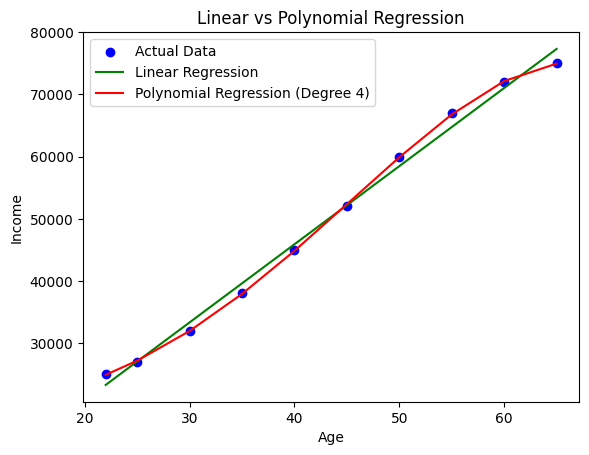

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Sample synthetic data: Age vs Income
data = {
    'Age': [22, 25, 30, 35, 40, 45, 50, 55, 60, 65],
    'Income': [25000, 27000, 32000, 38000, 45000, 52000, 60000, 67000, 72000, 75000]
}

df = pd.DataFrame(data)

X = df[['Age']].values
y = df['Income'].values

# Fit simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Fit Polynomial Regression (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Evaluation metrics
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)

mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f"Linear Regression -> MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")
print(f"Polynomial Regression (Degree 4) -> MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")

# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')

# Sort for smooth line plotting
X_sorted_idx = np.argsort(X.flatten())
X_sorted = X[X_sorted_idx]

plt.plot(X_sorted, linear_model.predict(X_sorted), color='green', label='Linear Regression')
plt.plot(X_sorted, poly_model.predict(poly.transform(X_sorted)), color='red', label='Polynomial Regression (Degree 4)')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()


Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

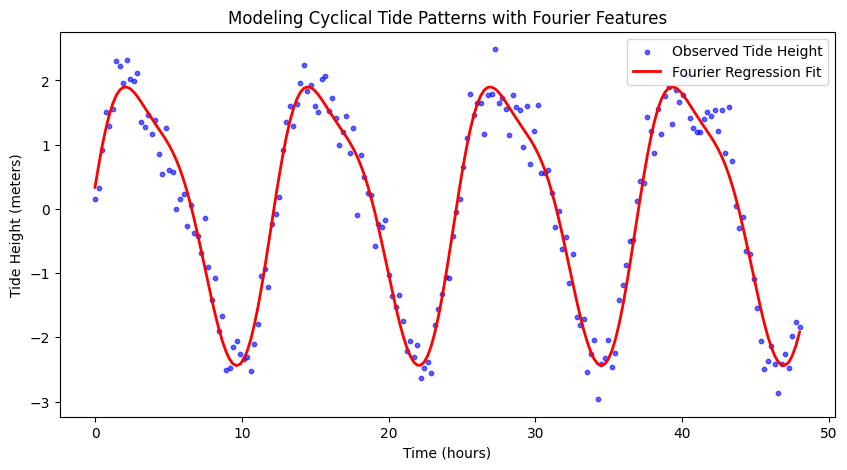

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data: time vs tide height (cyclical)
np.random.seed(42)
time = np.linspace(0, 48, 200)  # 48 hours, sampled 200 points
# Tide height modeled as a sum of sine waves + noise
tide_height = 2 * np.sin(2 * np.pi * time / 12.42) + 0.5 * np.sin(2 * np.pi * time / 6) + 0.3 * np.random.randn(len(time))

# Prepare Fourier features: sine and cosine terms for fundamental frequency
def fourier_features(x, period, n_harmonics=3):
    features = []
    for i in range(1, n_harmonics + 1):
        features.append(np.sin(2 * np.pi * i * x / period))
        features.append(np.cos(2 * np.pi * i * x / period))
    return np.vstack(features).T

# Create features with period = 12.42 hours (approximate tidal period)
X_fourier = fourier_features(time, period=12.42, n_harmonics=3)

# Fit linear regression on Fourier features
model = LinearRegression()
model.fit(X_fourier, tide_height)
tide_pred = model.predict(X_fourier)

# Plot original data and model prediction
plt.figure(figsize=(10, 5))
plt.scatter(time, tide_height, s=10, label='Observed Tide Height', color='blue', alpha=0.6)
plt.plot(time, tide_pred, label='Fourier Regression Fit', color='red', linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height (meters)')
plt.title('Modeling Cyclical Tide Patterns with Fourier Features')
plt.legend()
plt.show()
